# Exploratory analysis for the Boston Airbnb listings

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

from xgboost import XGBRegressor

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
pd.options.display.max_columns = None

# Outline
1. Load data
2. Prepare and have a brief look at the target value, price
3. Select numeric features and categorical features
4. Explore the self-correlation matrix of the numerical features
5. Fill in missig values for numeric and categorical features
6. Transform categorical features in numerical features using one hot encoding
7. Assemble the final set of features
8. Run prediction models
9. Display feature importance

## 1. Load data

In [2]:
listings_file_path = './listings.csv'

In [3]:
listings_df = pd.read_csv(listings_file_path)

In [4]:
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,3575.000000,3576.000000,56.000000,3585.000000,3585.000000,3.585000e+03,0.0,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,1.255944,1.609060,858.464286,1.429847,3.171269,2.872584e+04,NaN,8.64993,21.833194,38.558159,179.346444,19.044630,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,0.000000e+00,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,0.753060,1.011745,608.874310,1.056787,8.874133,1.670136e+06,NaN,10.43533,21.860966,33.158272,142.136180,35.571658,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,1.000000,1.000000,415.000000,1.000000,1.000000,3.650000e+02,NaN,0.00000,0.000000,0.000000,19.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,1.000000,1.000000,825.000000,1.000000,2.000000,1.125000e+03,NaN,4.00000,16.000000,37.000000,179.000000,5.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,2.000000,2.000000,1200.000000,1.000000,3.000000,1.125000e+03,NaN,15.00000,40.000000,68.000000,325.000000,21.000000,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,5.000000,16.000000,2400.000000,14.000000,300.000000,1.000000e+08,NaN,30.00000,60.000000,90.000000,365.000000,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [5]:
listings_df.shape

(3585, 95)

In [6]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

## 2. Prepare and have a brief look at the target value, price

In [7]:
# price is an object, a string starting with $ and containing commas and dot separators
listings_df.price

0       $250.00
1        $65.00
2        $65.00
3        $75.00
4        $79.00
         ...   
3580     $69.00
3581    $150.00
3582    $198.00
3583     $65.00
3584     $65.00
Name: price, Length: 3585, dtype: object

In [8]:
# Good thing is: there are no missing values in the price column

listings_df.price.isna().sum()

0

In [9]:
# Let's remove the $ and the commas, convert to float and collect the price values in the y, target variable:

y = listings_df.price.replace('[\$,]', '', regex=True).astype(float)

y.describe()

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

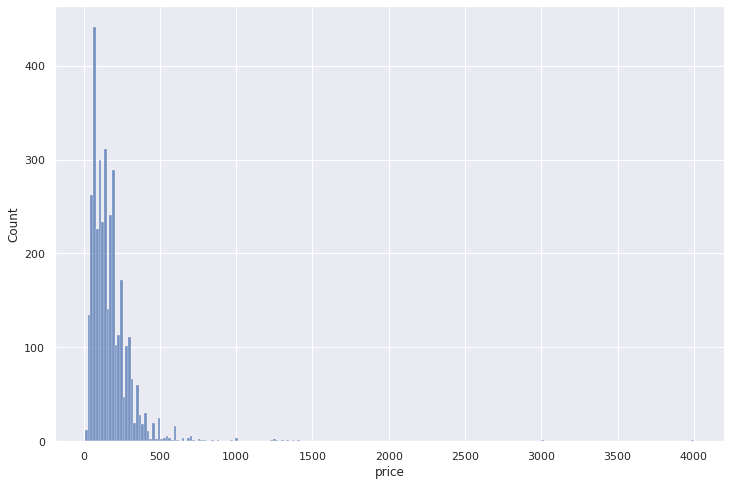

In [10]:
# Plot a histogram; the data is very skewed - expected as we talk about money; but apparently many datasets are skewed anyway

sns.set(rc={'figure.figsize':(12,8)})
sns.histplot(data=y, x=y)

<AxesSubplot:xlabel='price', ylabel='Count'>

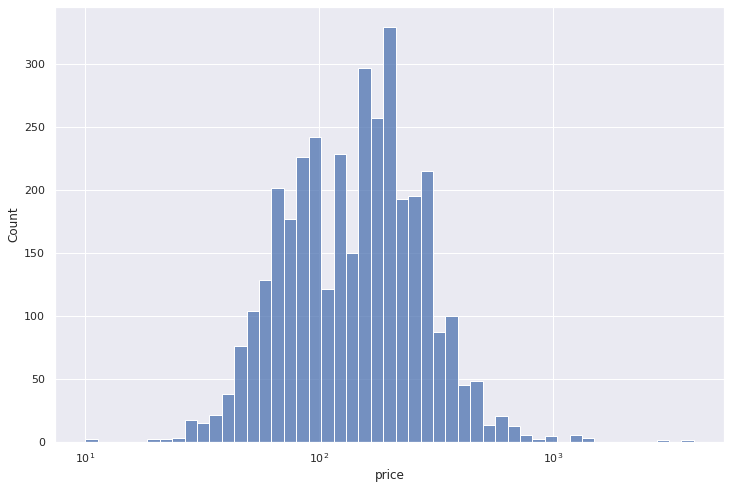

In [11]:
# On a log scale it looks more uniformly distributed:

sns.set(rc={'figure.figsize':(12,8)})
sns.histplot(data=y, x=y, log_scale=True)

## 3. Select numeric features and categorical features

### 3.1 Select numeric features

In [12]:
# only select numerical features with cardinality greater than 1

num_columns = [ (col, listings_df[col].nunique(), listings_df[col].isna().sum(), listings_df[col].dtype) \
               for col in listings_df.columns if listings_df[col].dtype != 'object' and 1 < listings_df[col].nunique() ]

In [13]:
num_columns

[('id', 3585, 0, dtype('int64')),
 ('host_id', 2181, 0, dtype('int64')),
 ('host_listings_count', 35, 0, dtype('int64')),
 ('host_total_listings_count', 35, 0, dtype('int64')),
 ('latitude', 3585, 0, dtype('float64')),
 ('longitude', 3585, 0, dtype('float64')),
 ('accommodates', 14, 0, dtype('int64')),
 ('bathrooms', 12, 14, dtype('float64')),
 ('bedrooms', 6, 10, dtype('float64')),
 ('beds', 11, 9, dtype('float64')),
 ('square_feet', 37, 3529, dtype('float64')),
 ('guests_included', 13, 0, dtype('int64')),
 ('minimum_nights', 29, 0, dtype('int64')),
 ('maximum_nights', 85, 0, dtype('int64')),
 ('availability_30', 31, 0, dtype('int64')),
 ('availability_60', 61, 0, dtype('int64')),
 ('availability_90', 91, 0, dtype('int64')),
 ('availability_365', 348, 0, dtype('int64')),
 ('number_of_reviews', 178, 0, dtype('int64')),
 ('review_scores_rating', 48, 813, dtype('float64')),
 ('review_scores_accuracy', 8, 823, dtype('float64')),
 ('review_scores_cleanliness', 9, 818, dtype('float64')),
 (

#### id is a synthetic unique field - we''l drop it because it has no prediction value
#### Same for the host_id: it is a synthetic Airbnb unique identifier for the host/user
#### square_feet is mostly null; we'll drop this field
#### host_listings_count and host_total_listings_count look very similar in terms of data dictionary description and unique values; the next cell proves these fields are identical so we'll drop one of them, say host_listings_count

In [14]:
sum(listings_df['host_listings_count'] != listings_df['host_total_listings_count'])

0

In [15]:
# recreate num_columns with column names only:
num_columns = [ col \
               for col in listings_df.columns if listings_df[col].dtype != 'object' and 1 < listings_df[col].nunique() ]

In [16]:
# remove the fields listed above
num_columns.remove('id')
num_columns.remove('host_id')
num_columns.remove('host_listings_count')
num_columns.remove('square_feet') # most of it is NA

In [17]:
num_columns

['host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'reviews_per_month']

### 3.2 Select categorical features

#### Let's have a look at the cardinality of the categorical features

In [18]:
cat_columns = [ (col, listings_df[col].nunique()) for col in listings_df.columns if listings_df[col].dtype == 'object' ]

In [19]:
sorted(cat_columns, key=lambda x: x[1])

[('last_scraped', 1),
 ('experiences_offered', 1),
 ('state', 1),
 ('country_code', 1),
 ('country', 1),
 ('calendar_last_scraped', 1),
 ('requires_license', 1),
 ('host_is_superhost', 2),
 ('host_has_profile_pic', 2),
 ('host_identity_verified', 2),
 ('is_location_exact', 2),
 ('instant_bookable', 2),
 ('require_guest_profile_picture', 2),
 ('require_guest_phone_verification', 2),
 ('room_type', 3),
 ('host_response_time', 4),
 ('market', 4),
 ('cancellation_policy', 4),
 ('bed_type', 5),
 ('property_type', 13),
 ('neighbourhood_cleansed', 25),
 ('neighbourhood', 30),
 ('city', 38),
 ('calendar_updated', 38),
 ('smart_location', 39),
 ('zipcode', 43),
 ('extra_people', 51),
 ('host_response_rate', 52),
 ('host_neighbourhood', 53),
 ('security_deposit', 54),
 ('host_acceptance_rate', 72),
 ('cleaning_fee', 79),
 ('host_verifications', 83),
 ('host_location', 176),
 ('weekly_price', 243),
 ('monthly_price', 288),
 ('price', 324),
 ('last_review', 404),
 ('first_review', 975),
 ('street'

#### Usual advice is to consider for numerical encoding only relatively low cardinality features with less than 10-15 distinct values; we'll set this threshold to 15 which will include the property type feature

In [20]:
cat_columns = [ col \
               for col in listings_df.columns if listings_df[col].dtype == 'object' and 1 < listings_df[col].nunique() <= 15]

In [21]:
cat_columns

['host_response_time',
 'host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'market',
 'is_location_exact',
 'property_type',
 'room_type',
 'bed_type',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

## 4. Explore the self-correlation matrix of the numerical features

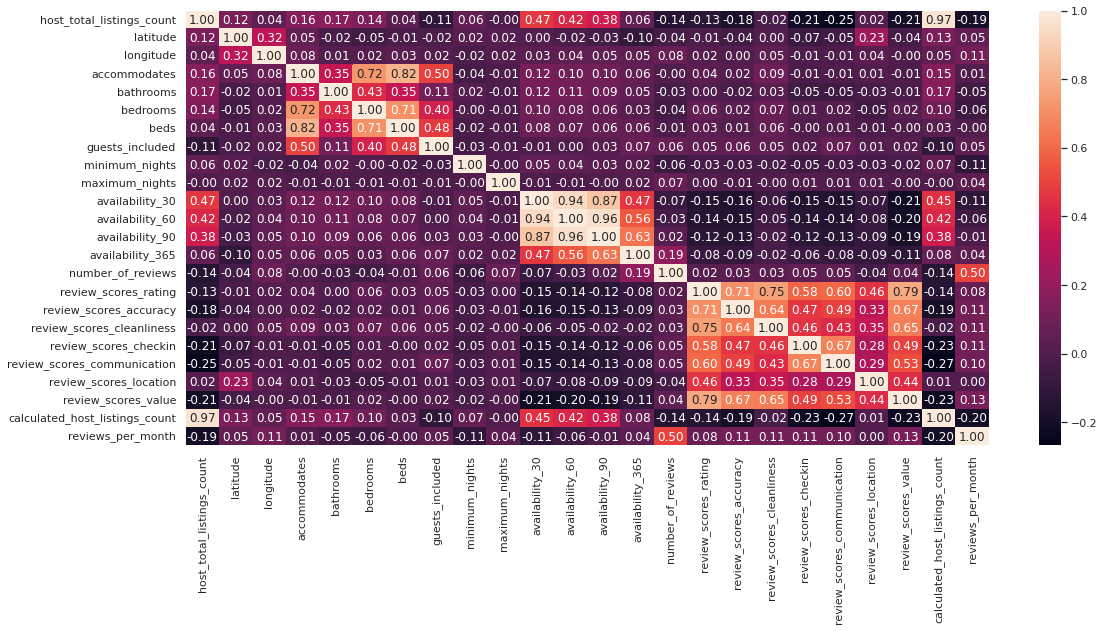

In [22]:
fig = plt.gcf()
fig.set_size_inches(18,8)
sns.heatmap(listings_df[num_columns].corr(), annot=True, fmt=".2f");

Perhaps unsurprisingly, the following features show a significant degree of correlation: accomodates, bathrooms, bedrooms, beds, guests_included. They all describe in one way or another the capacity of the listing to accomodate people - so some degree of correlation is expected.

Another cluster of correlated features is the availability_30/60/90/365. Success is always unequally distributed, and the availability measures perhaps the (lack of) success of the listings. Popular listings will tend to be fully booked for most of the time while unpopular hosts will list availability for most of the foreseable periods: 30/60/90/365 days in the future - hence the significant correlation of these features. 

The availability features also show correlation with calculated_host_listings_count and host_total_listings_count, again, somewhat expected: the more listings there are per host, the more likely some of them will be available.

Finally there is a correlated cluster of features describing reviews - 7 of them. That means people tend to provide consistent reviews - be them on the positive or negative side.

## 5. Fill in missig values for numeric and categorical features

### 5.1 Fill in missig values for numerical features

In [23]:
# select columns with missing data

num_cols_with_missing = [col for col in num_columns if listings_df[col].isnull().any()]

In [24]:
num_cols_with_missing

['bathrooms',
 'bedrooms',
 'beds',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

Fill Missing Numerical Values

In [25]:
mean_imputer = SimpleImputer(strategy='mean')

In [26]:
imputed_X_num = pd.DataFrame(mean_imputer.fit_transform(listings_df[num_columns]))

In [27]:
# the imputation loses column names
imputed_X_num

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,1.0,42.282619,-71.133068,4.0,1.5,2.0,3.0,1.0,2.0,1125.0,0.0,0.0,0.0,0.0,0.0,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,1.0,1.970908
1,1.0,42.286241,-71.134374,2.0,1.0,1.0,1.0,0.0,2.0,15.0,26.0,54.0,84.0,359.0,36.0,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.0,1.300000
2,1.0,42.292438,-71.135765,2.0,1.0,1.0,1.0,1.0,3.0,45.0,19.0,46.0,61.0,319.0,41.0,98.000000,10.000000,9.000000,10.000000,10.000000,9.000000,10.000000,1.0,0.470000
3,1.0,42.281106,-71.121021,4.0,1.0,1.0,2.0,2.0,1.0,1125.0,6.0,16.0,26.0,98.0,1.0,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.0,1.000000
4,1.0,42.284512,-71.136258,2.0,1.5,1.0,2.0,1.0,2.0,31.0,13.0,34.0,59.0,334.0,29.0,99.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,1.0,2.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,28.0,42.380968,-71.083795,3.0,1.0,1.0,1.0,1.0,2.0,1125.0,21.0,51.0,81.0,356.0,4.0,90.000000,10.000000,10.000000,10.000000,10.000000,8.000000,9.000000,8.0,0.340000
3581,2.0,42.347503,-71.118336,2.0,1.0,1.0,1.0,1.0,3.0,365.0,29.0,59.0,89.0,364.0,0.0,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,2.0,1.970908
3582,1.0,42.371771,-71.071300,4.0,1.0,1.0,1.0,1.0,3.0,12.0,0.0,15.0,40.0,40.0,0.0,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,1.0,1.970908
3583,4.0,42.385226,-71.080923,2.0,1.0,1.0,1.0,1.0,1.0,13.0,5.0,5.0,5.0,253.0,2.0,90.000000,9.000000,8.000000,9.000000,9.000000,8.000000,7.000000,1.0,2.000000


In [28]:
# put back the column names
imputed_X_num.columns = listings_df[num_columns].columns

In [29]:
imputed_X_num

,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,1.0,42.282619,-71.133068,4.0,1.5,2.0,3.0,1.0,2.0,1125.0,0.0,0.0,0.0,0.0,0.0,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,1.0,1.970908
1,1.0,42.286241,-71.134374,2.0,1.0,1.0,1.0,0.0,2.0,15.0,26.0,54.0,84.0,359.0,36.0,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.0,1.300000
2,1.0,42.292438,-71.135765,2.0,1.0,1.0,1.0,1.0,3.0,45.0,19.0,46.0,61.0,319.0,41.0,98.000000,10.000000,9.000000,10.000000,10.000000,9.000000,10.000000,1.0,0.470000
3,1.0,42.281106,-71.121021,4.0,1.0,1.0,2.0,2.0,1.0,1125.0,6.0,16.0,26.0,98.0,1.0,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.0,1.000000
4,1.0,42.284512,-71.136258,2.0,1.5,1.0,2.0,1.0,2.0,31.0,13.0,34.0,59.0,334.0,29.0,99.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,1.0,2.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,28.0,42.380968,-71.083795,3.0,1.0,1.0,1.0,1.0,2.0,1125.0,21.0,51.0,81.0,356.0,4.0,90.000000,10.000000,10.000000,10.000000,10.000000,8.000000,9.000000,8.0,0.340000
3581,2.0,42.347503,-71.118336,2.0,1.0,1.0,1.0,1.0,3.0,365.0,29.0,59.0,89.0,364.0,0.0,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,2.0,1.970908
3582,1.0,42.371771,-71.071300,4.0,1.0,1.0,1.0,1.0,3.0,12.0,0.0,15.0,40.0,40.0,0.0,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,1.0,1.970908
3583,4.0,42.385226,-71.080923,2.0,1.0,1.0,1.0,1.0,1.0,13.0,5.0,5.0,5.0,253.0,2.0,90.000000,9.000000,8.000000,9.000000,9.000000,8.000000,7.000000,1.0,2.000000


### 5.2 Fill in missig values for categorical features

In [30]:
cat_cols_with_missing = [col for col in cat_columns if listings_df[col].isnull().any()]

In [31]:
cat_cols_with_missing

['host_response_time', 'market', 'property_type']

In [32]:
mf_imputer = SimpleImputer(strategy='most_frequent')

In [33]:
imputed_X_cat = pd.DataFrame(mf_imputer.fit_transform(listings_df[cat_columns]))

In [34]:
imputed_X_cat.columns = listings_df[cat_columns].columns

In [35]:
imputed_X_cat

,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,market,is_location_exact,property_type,room_type,bed_type,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,within an hour,f,t,f,Boston,t,House,Entire home/apt,Real Bed,f,moderate,f,f
1,within an hour,f,t,t,Boston,t,Apartment,Private room,Real Bed,t,moderate,f,f
2,within a few hours,t,t,t,Boston,t,Apartment,Private room,Real Bed,f,moderate,t,f
3,within a few hours,f,t,f,Boston,f,House,Private room,Real Bed,f,moderate,f,f
4,within an hour,t,t,t,Boston,t,House,Private room,Real Bed,f,flexible,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,within an hour,f,t,t,Boston,t,Apartment,Private room,Real Bed,t,strict,f,f
3581,a few days or more,f,t,t,Boston,f,Apartment,Private room,Real Bed,f,strict,f,f
3582,within a day,f,t,f,Boston,f,Apartment,Entire home/apt,Real Bed,f,flexible,f,f
3583,within an hour,f,t,t,Boston,t,Apartment,Private room,Real Bed,f,strict,f,f


## 6. Transform categorical features in numerical features using one hot encoding

In [36]:
# one hot encoding
oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [37]:
ohe_X_cat = pd.DataFrame(oh_encoder.fit_transform(imputed_X_cat))

In [38]:
# one hot encoding removes the index; add it back
ohe_X_cat.index = imputed_X_cat.index

In [39]:
# it also looses the column names an values; we can at least recover easily the values
ohe_X_cat.columns = oh_encoder.get_feature_names()

In [40]:
ohe_X_cat.head()

,x0_a few days or more,x0_within a day,x0_within a few hours,x0_within an hour,x1_f,x1_t,x2_f,x2_t,x3_f,x3_t,x4_Boston,x4_Other (Domestic),x4_Other (International),x4_San Francisco,x5_f,x5_t,x6_Apartment,x6_Bed & Breakfast,x6_Boat,x6_Camper/RV,x6_Condominium,x6_Dorm,x6_Entire Floor,x6_Guesthouse,x6_House,x6_Loft,x6_Other,x6_Townhouse,x6_Villa,x7_Entire home/apt,x7_Private room,x7_Shared room,x8_Airbed,x8_Couch,x8_Futon,x8_Pull-out Sofa,x8_Real Bed,x9_f,x9_t,x10_flexible,x10_moderate,x10_strict,x10_super_strict_30,x11_f,x11_t,x12_f,x12_t
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


the x0..x12 prefixes correspond to the column positions in the imputed_X_cat dataframe:

In [41]:
imputed_X_cat.columns

Index(['host_response_time', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'market', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification'],
      dtype='object')

## 7. Assemble the final set of features

In [42]:
# finnaly we can build X with numeric features;
X = pd.concat([imputed_X_num, ohe_X_cat], axis=1)

In [43]:
X

,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,x0_a few days or more,x0_within a day,x0_within a few hours,x0_within an hour,x1_f,x1_t,x2_f,x2_t,x3_f,x3_t,x4_Boston,x4_Other (Domestic),x4_Other (International),x4_San Francisco,x5_f,x5_t,x6_Apartment,x6_Bed & Breakfast,x6_Boat,x6_Camper/RV,x6_Condominium,x6_Dorm,x6_Entire Floor,x6_Guesthouse,x6_House,x6_Loft,x6_Other,x6_Townhouse,x6_Villa,x7_Entire home/apt,x7_Private room,x7_Shared room,x8_Airbed,x8_Couch,x8_Futon,x8_Pull-out Sofa,x8_Real Bed,x9_f,x9_t,x10_flexible,x10_moderate,x10_strict,x10_super_strict_30,x11_f,x11_t,x12_f,x12_t
0,1.0,42.282619,-71.133068,4.0,1.5,2.0,3.0,1.0,2.0,1125.0,0.0,0.0,0.0,0.0,0.0,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,1.0,1.970908,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,42.286241,-71.134374,2.0,1.0,1.0,1.0,0.0,2.0,15.0,26.0,54.0,84.0,359.0,36.0,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.0,1.300000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,42.292438,-71.135765,2.0,1.0,1.0,1.0,1.0,3.0,45.0,19.0,46.0,61.0,319.0,41.0,98.000000,10.000000,9.000000,10.000000,10.000000,9.000000,10.000000,1.0,0.470000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,42.281106,-71.121021,4.0,1.0,1.0,2.0,2.0,1.0,1125.0,6.0,16.0,26.0,98.0,1.0,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.0,1.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,42.284512,-71.136258,2.0,1.5,1.0,2.0,1.0,2.0,31.0,13.0,34.0,59.0,334.0,29.0,99.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,1.0,2.250000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,28.0,42.380968,-71.083795,3.0,1.0,1.0,1.0,1.0,2.0,1125.0,21.0,51.0,81.0,356.0,4.0,90.000000,10.000000,10.000000,10.000000,10.000000,8.000000,9.000000,8.0,0.340000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3581,2.0,42.347503,-71.118336,2.0,1.0,1.0,1.0,1.0,3.0,365.0,29.0,59.0,89.0,364.0,0.0,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,2.0,1.970908,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3582,1.0,42.371771,-71.071300,4.0,1.0,1.0,1.0,1.0,3.0,12.0,0.0,15.0,40.0,40.0,0.0,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,1.0,1.970908,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,

In [44]:
X.describe()

,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,x0_a few days or more,x0_within a day,x0_within a few hours,x0_within an hour,x1_f,x1_t,x2_f,x2_t,x3_f,x3_t,x4_Boston,x4_Other (Domestic),x4_Other (International),x4_San Francisco,x5_f,x5_t,x6_Apartment,x6_Bed & Breakfast,x6_Boat,x6_Camper/RV,x6_Condominium,x6_Dorm,x6_Entire Floor,x6_Guesthouse,x6_House,x6_Loft,x6_Other,x6_Townhouse,x6_Villa,x7_Entire home/apt,x7_Private room,x7_Shared room,x8_Airbed,x8_Couch,x8_Futon,x8_Pull-out Sofa,x8_Real Bed,x9_f,x9_t,x10_flexible,x10_moderate,x10_strict,x10_super_strict_30,x11_f,x11_t,x12_f,x12_t
count,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3.585000e+03,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000
mean,58.902371,42.340032,-71.084818,3.041283,1.221647,1.255944,1.609060,1.429847,3.171269,2.872584e+04,8.64993,21.833194,38.558159,179.346444,19.044630,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,12.733891,1.970908,0.011994,0.130823,0.339749,0.517434,0.886471,0.113529,0.002232,0.997768,0.273919,0.726081,0.999163,0.000279,0.000279,0.000279,0.140865,0.859135,0.729428,0.011437,0.003347,0.000279,0.064435,0.000558,0.001116,0.000279,0.156764,0.010879,0.004742,0.015063,0.001674,0.593305,0.384379,0.022315,0.011158,0.002789,0.014226,0.008647,0.963180,0.834310,0.165690,0.278661,0.256346,0.441283,0.023710,0.981311,0.018689,0.933891,0.066109
std,171.119663,0.024403,0.031565,1.778929,0.500507,0.752008,1.010473,1.056787,8.874133,1.670136e+06,10.43533,21.860966,33.158272,142.136180,35.571658,8.381157,0.817902,1.026947,0.669837,0.646143,0.793095,0.887785,29.415076,1.883678,0.108875,0.337254,0.473690,0.499766,0.317282,0.317282,0.047193,0.047193,0.446030,0.446030,0.028920,0.016701,0.016701,0.016701,0.347930,0.347930,0.444317,0.106343,0.057767,0.016701,0.245561,0.023616,0.033389,0.016701,0.363629,0.103746,0.068708,0.121820,0.040882,0.491285,0.486516,0.147727,0.105053,0.052748,0.118438,0.092600,0.188346,0.371854,0.371854,0.448403,0.436676,0.496610,0.152165,0.135443,0.135443,0.248507,0.248507
min,0.000000,42.235942,-71.171789,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,42.329995,-71.105083,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.650000e+02,0.00000,0.000000,0.000000,19.000000,1.000000,91.000000,9.000000,9.000000,9.646293,9.646549,9.000000,9.000000,1.0

## 8. Run prediction models

In [45]:
# first calculate the mean absolute error when the prediction is just a simple average
y_pred = y.copy()
y_pred = y_pred - y_pred + y.mean()
mean_absolute_error(y, y_pred)

88.5849858682057

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, 
                                                      random_state=0)

In [47]:
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)

y_pred = lm_model.predict(X_test)

In [48]:
mean_absolute_error(y_test, y_pred)

61.07391910739191

In [49]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mean_absolute_error(y_test, y_pred)

52.69527196652719

In [50]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
mean_absolute_error(y_test, y_pred)

56.430138840668704

In [51]:
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
mean_absolute_error(y_test, y_pred)

52.39161883504487

## 9. Display feature importance

In [52]:
len(rf_model.feature_importances_)

71

In [53]:
X_test.shape

(717, 71)

In [58]:
fi = pd.DataFrame(rf_model.feature_importances_, index=X_test.columns, columns=['fi']).sort_values('fi', ascending=False)
pd.options.display.max_rows = None
fi

,fi
x7_Entire home/apt,2.337478e-01
longitude,1.685984e-01
bathrooms,1.195159e-01
latitude,7.500666e-02
availability_365,3.293117e-02
availability_90,2.701877e-02
bedrooms,2.590484e-02
availability_60,2.575944e-02
availability_30,2.459939e-02
minimum_nights,2.425289e-02


In [59]:
fi = pd.DataFrame(xgb_model.feature_importances_, index=X_test.columns, columns=['fi']).sort_values('fi', ascending=False)
pd.options.display.max_rows = None
fi

,fi
x7_Entire home/apt,0.355467
x10_super_strict_30,0.103848
bathrooms,0.094353
bedrooms,0.076883
x12_f,0.031636
x3_f,0.025908
x0_a few days or more,0.022028
x6_Other,0.020208
longitude,0.020195
availability_30,0.017559


Top spot on both algorithms is "x7_Entire home/apt" which is a categorical value present in the initial field room_type. So, whether you share the property or not with someone else has the most impact on the price. Perhaps people prefer not to share the property during their stay thus driving up prices for this type of listing.

Bathrooms and bedrooms also have a big impact on the price as well as the availability. Again, not surprising, the bigger the house the bigger the number of bathrooms and bedrooms which drives the price up.

On the location, both alghoritms give a high rank to the longitude. Latitude is also important but less so, ranking 4th on Random Forest and not event making the top 10 for XGBoost (but close - it takes the 11th spot). Location matters but it seems the Est-West position is more important than the North-South one - this may mean something to people familiar with the Boston area.